In [62]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

iris = datasets.load_iris()  # 鸢尾花数据集
X = iris.data[:, :2]  # 只选择两个特征
y = iris.target

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [64]:
def PolynomialKernelSVC(C=1.0, gamma=2, decision_function_shape='ovr'):
    return Pipeline([
        ("std_scaler", StandardScaler()),  # 均值方差归一化
        ("kernelSVC", SVC(gamma=gamma, C=C,
                          decision_function_shape=decision_function_shape))
    ])

In [65]:
svc_method = PolynomialKernelSVC(decision_function_shape='ovo')  # 默认decision_function_shape='ovr'(可选参数为:'ovr', 'ovo')
svc_method.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('kernelSVC',
                 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=2,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [66]:
svc_method.score(X_test, y_test)

0.7894736842105263

In [67]:
def plot_decision_boundary(model,
                           axis):  # 坐标轴范围
    """绘制决策边界"""
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1] - axis[0]) * 200)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3] - axis[2]) * 200)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['yellow', 'red', 'white'])

    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

D:\CodeProgram\anconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: The following kwargs were not used by contour: 'linewidth'
  app.launch_new_instance()


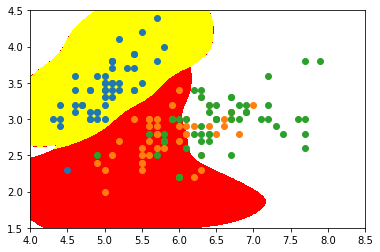

In [68]:
plot_decision_boundary(svc_method, axis=[4, 8.5, 1.5, 4.5])
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.scatter(X[y == 2, 0], X[y == 2, 1])
plt.show()